#Question 1

In [30]:
import numpy as np
import random
from numpy.linalg import inv
from numpy import linalg as ll
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Question 1.1

In [2]:
def data_generation1(n, d):
    w_star = np.zeros(d)


    for j in range(0,d):
        w_star[j] = np.random.rand()
        while w_star[j] == 0:
            w_star[j] = np.random.rand()

    w_star = np.matrix(w_star)
    
    #construct noise model
    mu, sigma = 0, 0.1
    eta = sigma*np.random.randn(n)
    eta = np.matrix(eta)
    #construct synthetic data x with n*d and y with n*1
    x = np.random.normal(mu, sigma, n*d).reshape(n, d)
    x = np.matrix(x)
    y = np.matrix(x)* w_star.T + eta.T
    
    return x, y, w_star

In [23]:
#Ordinary Least Square Estimator
def w_estimate(x,y):
    xTx = x.T * x
    w = (xTx).I*(x.T*y)    
    return w

In [61]:
def plotting(x_axis,y_axis,x_axis_step = 20):

    matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
    fig, ax = plt.subplots()
    ax.plot(x_axis, y_axis, color="green", marker = 'o',ls ='-')
    
    x_start, x_end = ax.get_xlim()
    ax.set_xticks(np.arange(x_start, x_end, x_axis_step))

In [11]:
d = 50
N = [10,20,30,40,50,60,70,80,90,100,150,200]

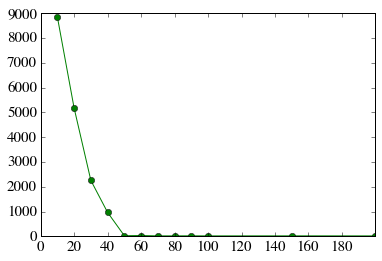

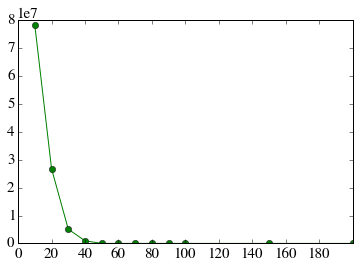

In [51]:
error = []
error_squared = []
for n in N:
    x,y,w_star = data_generation1(n,d)
    w_ls = w_estimate(x,y)
    result = ll.norm(w_star-w_ls)
    error.append(result)
    error_squared.append(np.power(result,2))

plotting(N, error)
plotting(N, error_squared)

## Question 1.2

In [15]:
def data_generation2(n, d):
    w_star = np.zeros(d)

    ind = random.sample(range(0,d),1)
    w_star[ind] = np.random.rand()
    while w_star[ind] == 0:
        w_star[ind] = np.random.rand()

    w_star = np.matrix(w_star)
    
    #construct noise model
    mu, sigma = 0, 0.1
    eta = sigma*np.random.randn(n)
    eta = np.matrix(eta)
    #construct synthetic data x with n*d and y with n*1
    x = np.random.normal(mu, sigma, n*d).reshape(n, d)
    x = np.matrix(x)
    y = np.matrix(x)* w_star.T + eta.T
    
    return x, y, w_star

In [59]:
N = range(10,500,10)

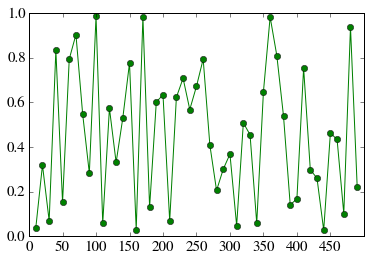

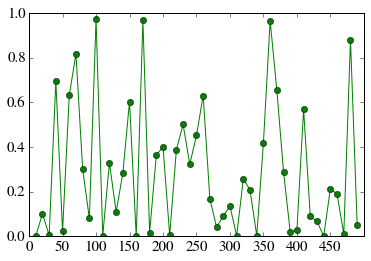

In [62]:
error = []
error_squared = []
for n in N:
    x,y,w_star = data_generation2(n,d)
    min_error = 100000000
    for col in range(d):
        w_ls = w_estimate(x[:,col],y)
        temp_error = ll.norm(w_star-w_ls)
        if temp_error < min_error:
            min_error = temp_error
            w = w_ls
        
    error.append(min_error)
    error_squared.append(np.power(min_error,2))

plotting(N, error,x_axis_step = 50)
plotting(N, error_squared,x_axis_step = 50)